# 2. Regression

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.impute import SimpleImputer, KNNImputer


## 2.1. Dataset

In [3]:
#loading the data 
data = pd.read_csv("kanga.csv")
#displaying first rows of the data
data.head()

,X,Y
0,609,241
1,629,222
2,620,233
3,564,207
4,645,247


## 2.2. EDA

Text(0.5, 1.0, 'Nasal length vs. Nasal width of kangaroos')

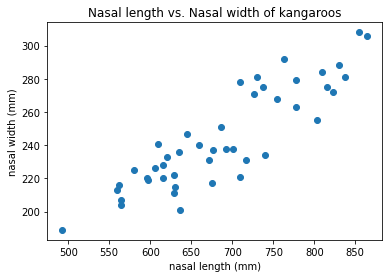

In [4]:
#scatter plot of X and Y variables of the data 
plt.scatter(data["X"], data["Y"])
plt.xlabel("nasal length (mm)")
plt.ylabel("nasal width (mm)")
plt.title("Nasal length vs. Nasal width of kangaroos")

## 2.3. Regression Tasks

### 2.3.1. Train-test split

In [5]:
#splitting the data and convering the columns to numpy arrays 
#Code: (https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array)
#Code: (https://stackoverflow.com/questions/51150153/valueerror-expected-2d-array-got-1d-array-instead)
X = data["X"].to_numpy().reshape(-1, 1)
y = data["Y"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,  
                                                    test_size = 0.10, 
                                                    train_size = 0.90, 
                                                    random_state = 202)


### 2.3.2. Fitting a linear model 

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
pred_lin_reg = lin_reg.predict(X_test)
print(pred_lin_reg)
print(f"R2 score: {lin_reg.score(X_test, y_test)}")

[278.93904888 252.71324165 189.54570596 227.89742406 256.3792147 ]
R2 score: 0.8053634832560124


In [7]:
print(lin_reg.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


### 2.3.3. Cross validation

In [8]:
cv_scores_lin_reg = cross_val_score(lin_reg, X, y, scoring='r2')
print(cv_scores_lin_reg)
print(f"Mean R2 scores: {cv_scores_lin_reg.mean()}")



[ 0.61765389  0.63501709  0.90178865 -1.48731674  0.50294111]
Mean R2 scores: 0.23401679950607188


### 2.3.4. Comapring performance of different models 

In [40]:
dt_reg = DecisionTreeRegressor(random_state=202)
dt_reg.fit(X_train, y_train)
pred_dt_reg = dt_reg.predict(X_test)
print(pred_dt_reg)
print(f"R2 score: {dt_reg.score(X_test, y_test)}")

[275.  249.5 213.  222.  271. ]
R2 score: 0.8290200089676045


In [36]:
svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)
print(pred_svr)
print(f"R2 score: {svr.score(X_test, y_test)}")

[250.34105299 242.4428925  237.53658513 233.05292662 244.11018624]
R2 score: 0.23399078988500988


In [37]:
dt_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 202,
 'splitter': 'best'}

In [12]:
param_grid_svr = [{'kernel': ['rbf'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
                {'kernel': ['linear'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [48]:
# Grid Search with the SVR model 
gs_svr = GridSearchCV(SVR(), param_grid_svr, cv=3, n_jobs = -1)
gs_svr.fit(X_train, y_train)
pred_svr_gs = gs_svr.predict(X_test)
print(f"R-squared for test set: {gs_svr.score(X_test, y_test)}")
print(f"Best parameters: {gs_svr.best_params_}")
print(f"Best R-squared value: {gs_svr.best_score_}")

R-squared for test set: 0.8004209884174371
Best parameters: {'C': 10, 'kernel': 'linear'}
Best R-squared value: 0.6379762125217104


In [44]:
param_grid_dt = {'splitter': ['best', 'random'],
                'max_depth': [1, 2, 3, 4, 5 ,6]}

In [45]:
# Grid Search with Decision Tree Regression
gs_dt = GridSearchCV(DecisionTreeRegressor(random_state=202), param_grid_dt, cv=5, scoring ='r2')
gs_dt.fit(X_train, y_train)
pred_gs_dt = gs_dt.predict(X_test)
print(f"R-squared for test set: {gs_dt.score(X_test, y_test)}")
print(f"Best parameters: {gs_dt.best_params_}")
print(f"Best R-squared value: {gs_dt.best_score_}")

R-squared for test set: 0.6214186375608648
Best parameters: {'max_depth': 3, 'splitter': 'random'}
Best R-squared value: 0.5744010914801934


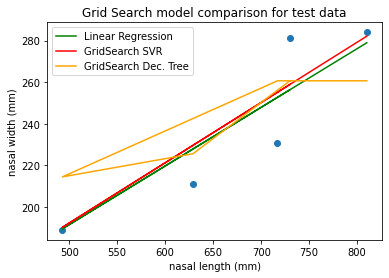

In [54]:
#plotting the results of the different Grid search models with the test data
preds = [pred_lin_reg, pred_svr_gs, pred_gs_dt]
colors = ["green", "red", "orange"]
labels = ["Linear Regression", "GridSearch SVR" , "GridSearch Dec. Tree"]
plt.scatter(X_test, y_test)
plt.xlabel("nasal length (mm)")
plt.ylabel("nasal width (mm)")
plt.title("Grid Search model comparison for test data")

for pred, color,lab in zip(preds, colors, labels):
    plt.plot(X_test, pred, color=color)
    
plt.legend(labels)

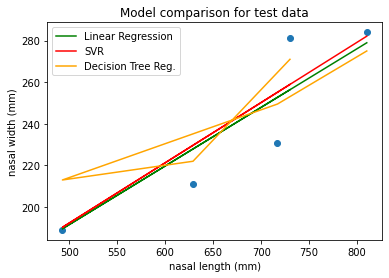

In [55]:
#plotting the results of the different models with the test data
preds = [pred_lin_reg, pred_svr, pred_dt_reg]
colors = ["green", "red", "orange"]
labels = ["Linear Regression", "SVR" , "Decision Tree Reg."]
plt.scatter(X_test, y_test)
plt.xlabel("nasal length (mm)")
plt.ylabel("nasal width (mm)")
plt.title("Model comparison for test data")

for pred, color,lab in zip(preds, colors, labels):
    plt.plot(X_test, pred, color=color)
    
plt.legend(labels)

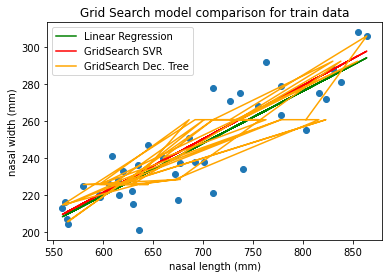

In [56]:
#plotting the results of the different models with the train data
preds = [lin_reg.predict(X_train), gs_svr.predict(X_train), gs_dt.predict(X_train)]
colors = ["green", "red", "orange"]
labels = ["Linear Regression", "GridSearch SVR" , "GridSearch Dec. Tree"]
plt.scatter(X_train, y_train)
plt.xlabel("nasal length (mm)")
plt.ylabel("nasal width (mm)")
plt.title("Grid Search model comparison for train data")

for pred, color,lab in zip(preds, colors, labels):
    plt.plot(X_train, pred, color=color)
    
plt.legend(labels)

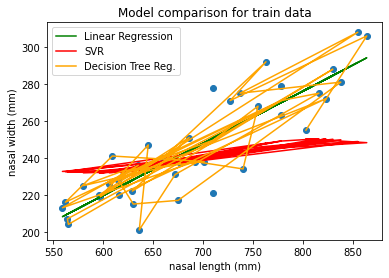

In [57]:
#plotting the results of the different models with the test data
preds = [lin_reg.predict(X_train), svr.predict(X_train), dt_reg.predict(X_train)]
colors = ["green", "red", "orange"]
labels = ["Linear Regression", "SVR" , "Decision Tree Reg."]
plt.scatter(X_train, y_train)
plt.xlabel("nasal length (mm)")
plt.ylabel("nasal width (mm)")
plt.title("Model comparison for train data")

for pred, color,lab in zip(preds, colors, labels):
    plt.plot(X_train, pred, color=color)
    
plt.legend(labels)

## 2.4 Missing data imputation

In [15]:
miss_data = pd.read_csv("2023683_nose.csv", usecols=[1,2]).values
X = miss_data[:,0].reshape(-1, 1)
y = miss_data[:,1].reshape(-1, 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=202)

In [17]:
#initializing simple imputer with the mean strategy 
mean_imp = SimpleImputer(strategy='mean')

In [18]:
#fitting the mean imputer and transforming the train and test data
X_train_mean = mean_imp.fit_transform(X_train)
X_test_mean = mean_imp.transform(X_test)

y_train_mean = mean_imp.fit_transform(y_train)
y_test_mean = mean_imp.transform(y_test)

In [19]:
#fitting a linear regression model to the mean imputed  data
lin_reg = LinearRegression()
lin_reg.fit(X_train_mean, y_train_mean)
lin_reg.score(X_train_mean, y_train_mean)

0.6674885307526675

In [20]:
mean_pred = lin_reg.predict(X_test_mean)
print(f"R-squared with mean imputation: {lin_reg.score(X_test_mean, y_test_mean)}")

R-squared with mean imputation: 0.5291305526662509


In [21]:
#initializing KNN imputer
knn_imp = KNNImputer(n_neighbors=3)

In [22]:
#fitting the KNN imputer and transforming the train and test data
X_train_knn = knn_imp.fit_transform(X_train)
X_test_knn = knn_imp.transform(X_test)

y_train_knn = knn_imp.fit_transform(y_train)
y_test_knn = knn_imp.transform(y_test)

In [23]:
#fitting a linear regression model to the KNN imputed data
lin_reg = LinearRegression()
lin_reg.fit(X_train_knn, y_train_knn)
lin_reg.score(X_train_knn, y_train_knn)

0.6674885307526675

In [24]:
# KNN imputation to the test data
knn_pred = lin_reg.predict(X_test_knn)
print(f"R-squared with mean imputation: {lin_reg.score(X_test_knn, y_test_knn)}")

R-squared with mean imputation: 0.5291305526662509
